Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_output (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Training the autoencoder...


2025-12-08 23:40:21.269161: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0391 - val_loss: 0.0227
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0198 - val_loss: 0.0169
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.0163 - val_loss: 0.0149
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0121 - val_loss: 0.0117
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0110 - val_loss: 0.0108
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


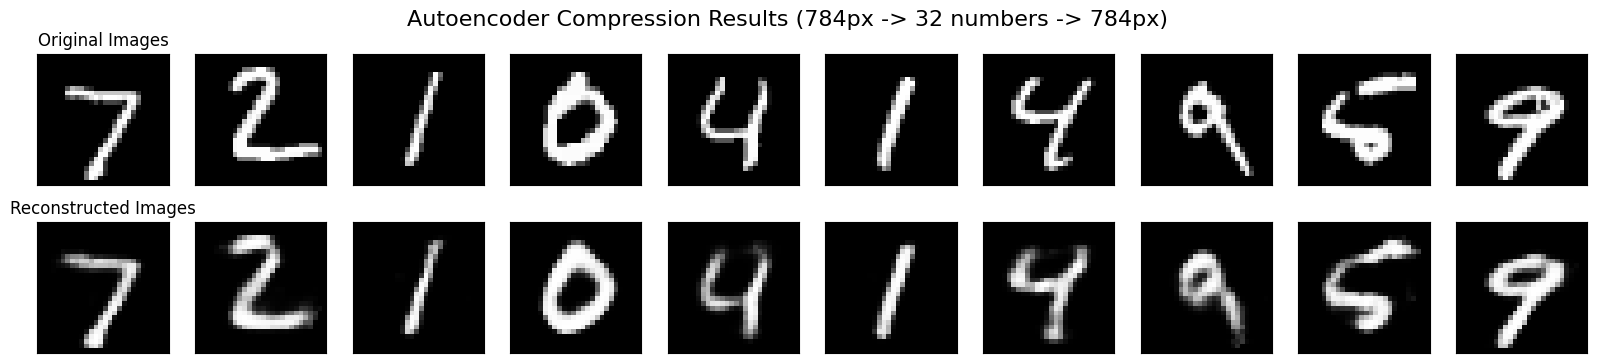

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
original_dim = 784
x_train = x_train.reshape((len(x_train), original_dim))
x_test = x_test.reshape((len(x_test), original_dim))

# 784 pixels -> 32 numbers (a 24.5x compression)
encoding_dim = 32


input_img = Input(shape=(original_dim,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu', name='encoder_output')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(original_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

print("Training the autoencoder...")

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))


decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
plt.suptitle("Autoencoder Compression Results (784px -> 32 numbers -> 784px)", fontsize=16)

for i in range(n):
    # --- Display original images ---
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original Images", fontsize=12)

    # --- Display reconstructed images ---
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Reconstructed Images", fontsize=12)

plt.show()



In [ ]:
# Build an encoder model: maps 784-dim input -> 32-dim code
encoder = Model(inputs=input_img, outputs=autoencoder.get_layer('encoder_output').output, name='encoder')

# Build a decoder submodel by slicing the autoencoder graph:
# input is the encoder_output (32-dim), output is the autoencoder's final output (784-dim)
decoder = Model(inputs=autoencoder.get_layer('encoder_output').output,
                outputs=autoencoder.output,
                name='decoder')

# Compress test images to latent codes
compressed_codes = encoder.predict(x_test)

# Decompress latent codes back to images
reconstructed_from_codes = decoder.predict(compressed_codes)

# Visualize: Original vs Decompressed (via explicit decoder)
n = 10
plt.figure(figsize=(20, 4))
plt.suptitle("Explicit Decompression Pipeline (Encoder -> Decoder)", fontsize=16)
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original", fontsize=12)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_from_codes[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Decompressed", fontsize=12)
plt.show()